## Import Packages

In [122]:
from pandas import Series, DataFrame
import pandas as pd
import re
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Generate and download gtf file for mus musculus Brca1 location

<url> https://genome.ucsc.edu/cgi-bin/hgTables </url>

<img src="gtfsource.JPG">

## Pull start and stop locations from gtf file

In [6]:
with open('exonlist','w') as exonlist:
    print("Exon\tStart\tStop", file = exonlist)
    with open('mouseBrca1','r') as gtfin:
        for line in gtfin:
            if (re.match(r".*exon.*", line)):
                line = line.strip()
                line = line.split('\t')
                start = line[3]
                stop = line[4]
                print("\t",start,"\t",stop, file = exonlist)

In [7]:
exon_list = pd.read_table('exonlist')

In [35]:
exon_list['Exon'] = range(1, len(exon_list) + 1)

In [46]:
exon_list

,Exon,Start,Stop
0,1,101488764,101489912
1,2,101491859,101491919
2,3,101492181,101492254
3,4,101493552,101493606
4,5,101497934,101498014
5,6,101501992,101502032
6,7,101502481,101502558
7,8,101505317,101505404
8,9,101507950,101508230
9,10,101509921,101510099


# Generating a dictionary of start and stop positions for each exon:

In [44]:
Exon_Dictionary = {}
for index, row in exon_list.iterrows():
    Exon_Dictionary[row['Exon']] = (row['Start'], row['Stop'])

In [45]:
Exon_Dictionary

{1: (101488764, 101489912),
 2: (101491859, 101491919),
 3: (101492181, 101492254),
 4: (101493552, 101493606),
 5: (101497934, 101498014),
 6: (101501992, 101502032),
 7: (101502481, 101502558),
 8: (101505317, 101505404),
 9: (101507950, 101508230),
 10: (101509921, 101510099),
 11: (101512720, 101512849),
 12: (101517271, 101517442),
 13: (101522432, 101522502),
 14: (101523325, 101526639),
 15: (101528001, 101528077),
 16: (101529791, 101529836),
 17: (101530992, 101531094),
 18: (101532020, 101532159),
 19: (101533939, 101534027),
 20: (101535528, 101535605),
 21: (101539981, 101540034),
 22: (101549015, 101549113),
 23: (101551769, 101551879)}

# BAM files downloaded from Encode RNA Dashboard

<url> http://genome.crg.es/encode_RNA_dashboard/mm9/ </url>

<img src="Encode.JPG">

# With SAMtools: 
* BAM files sorted and indexed
* Exon regions exported to individual BAM files
* Exon BAM files were indexed
* Mapped read counts using "indxstats"

# Result: files for each tissue with exon and total read counts

For example:

In [60]:
kidney_counts = pd.read_table('kidney_reads.txt')
kidney_counts

,Exon,Kidney
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,16
9,10,3


Note that the total at the bottom is the total number or reads for the tissue sample

# Individual files are joined

In [154]:
blood_counts = pd.read_table('blood_reads.txt')
del blood_counts['Exon']
brain_counts = pd.read_table('brain_reads.txt')
del brain_counts['Exon']
lung_limb_counts = pd.read_table('lung_limb_reads.txt')
del lung_limb_counts['Exon']

In [155]:
count_data = pd.concat([kidney_counts, blood_counts, brain_counts, lung_limb_counts], axis=1)
count_data

,Exon,Kidney,Blood,Brain,Limb,Lung
0,1,0,1,0,1,2
1,2,0,0,0,0,2
2,3,0,0,0,0,0
3,4,0,0,0,0,0
4,5,0,0,0,1,0
5,6,0,0,1,1,0
6,7,0,0,0,0,0
7,8,0,0,0,0,1
8,9,16,0,8,0,19
9,10,3,9,4,3,7


# Counts are normalized with a python script

In [156]:
count_data.to_csv("samples", index=False, sep='\t')

In [89]:
totals = []
with open('normalized_data','w') as outfile:
	with open('samples','r') as infile:
		for line in infile:
			if line.startswith("Total"):
				line1 = line.rstrip()
				totals = totals + line1.split()
				for i in range(1,len(totals)):
					totals[i] = int(totals[i])/1000000
		infile.seek(0)
		for line in infile:
			line1=line.strip()
			fields = line1.split
			if line.startswith("Total"):
				continue
			if line.startswith("Exon"):
				print(line, file=outfile)
			else:
				line1 = line.rstrip()
				fields = line1.split()
				for i in range(1,len(fields)):
					fields[i] = str(int(fields[i])/totals[i])
				print('\t'.join(fields), file=outfile)

In [157]:
normalized_data = pd.read_table('normalized_data', index_col='Exon')
normalized_data


,Kidney,Blood,Brain,Limb,Lung
Exon,,,,,
1,0.000000,0.036697,0.000000,0.040729,0.070566
2,0.000000,0.000000,0.000000,0.000000,0.070566
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.040729,0.000000
6,0.000000,0.000000,0.026922,0.040729,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.035283
9,0.497742,0.000000,0.215378,0.000000,0.670374


# Heatmap of exon expression

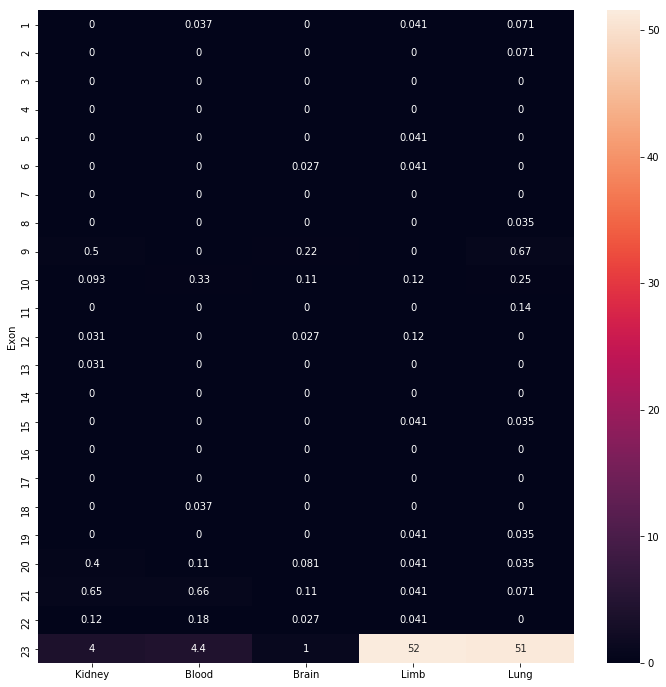

In [237]:
matplotlib.pyplot.figure(figsize=(12,12))
expression = seaborn.heatmap(normalized_data, annot=True, square=False)




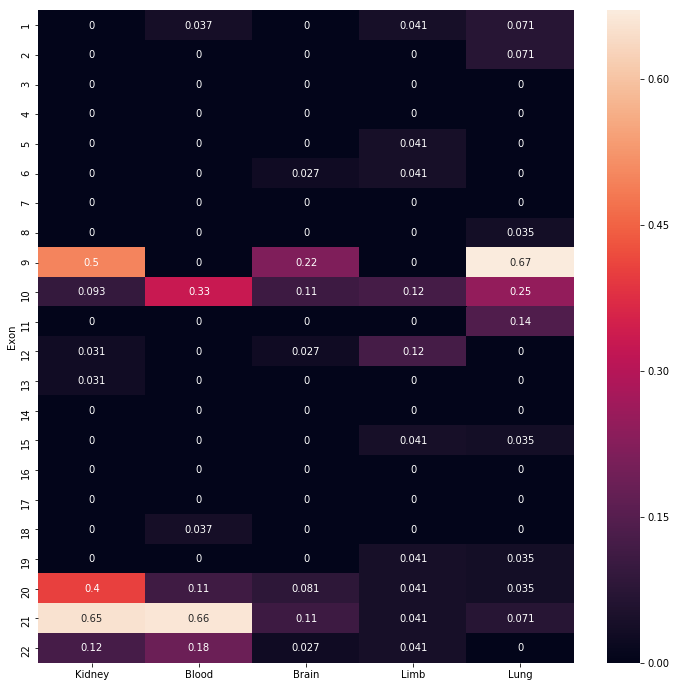

In [235]:
Minus23 = normalized_data.drop(normalized_data.index[22])
matplotlib.pyplot.figure(figsize=(12,12))
expression = seaborn.heatmap(Minus23, annot=True, square=False)

In [159]:
Exon23 = normalized_data.iloc[22]
Exon10 = normalized_data.iloc[9]

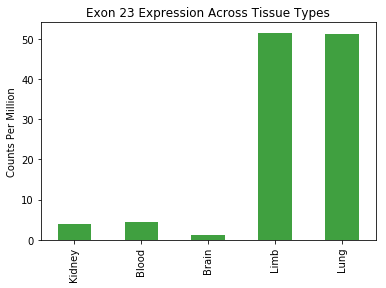

In [238]:
Plot23 = Exon23.plot(kind='bar', align='center', alpha=0.75, color = 'g')
plt.ylabel('Counts Per Million')
plt.title('Exon 23 Expression Across Tissue Types')
plt.show()

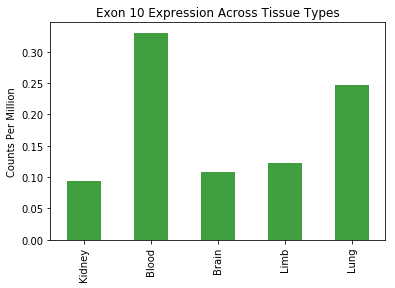

In [230]:
Plot10 = Exon10.plot(kind='bar', align='center', color = 'g',alpha=0.75)
plt.ylabel('Counts Per Million')
plt.title('Exon 10 Expression Across Tissue Types')
plt.show()

In [211]:
comparison = normalized_data.drop(normalized_data.index[:9])
comparison.drop(comparison.index[1:10], inplace=True)
comparison.drop(comparison.index[2], inplace=True)
comparison.drop(comparison.index[3], inplace=True)
comparison

,Kidney,Blood,Brain,Limb,Lung
Exon,,,,,
10,0.093327,0.330277,0.107689,0.122187,0.246980
20,0.404415,0.110092,0.080767,0.040729,0.035283
22,0.124436,0.183487,0.026922,0.040729,0.000000


In [212]:
comparison.reset_index()


,Exon,Kidney,Blood,Brain,Limb,Lung
0,10,0.093327,0.330277,0.107689,0.122187,0.246980
1,20,0.404415,0.110092,0.080767,0.040729,0.035283
2,22,0.124436,0.183487,0.026922,0.040729,0.000000


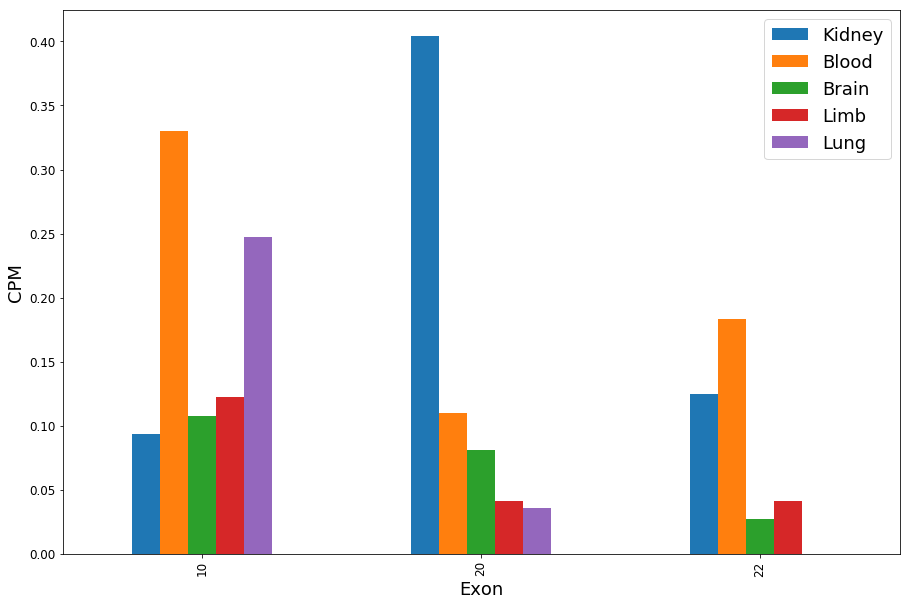

In [229]:

ax = comparison[['Kidney','Blood','Brain','Limb','Lung']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Exon", fontsize=18)
ax.set_ylabel("CPM", fontsize=18)
plt.legend(loc=1, prop={'size': 18})
plt.show()